In [1]:
import numpy as np
from pybdm import BDM
from pybdm.algorithms import PerturbationExperiment
import matplotlib.pyplot as plt

In [2]:
# Create a dataset (must be of integer type)
X = np.ones((100, 100), dtype=int)

In [3]:
# Initialize BDM object
bdm = BDM(ndim=2)

In [4]:
# Initialize perturbation experiment object
# (may be run for both bdm or entropy)
perturbation = PerturbationExperiment(bdm, X, metric='bdm')

In [5]:
# Compute BDM change for all data points
delta_bdm = perturbation.run()

<class 'numpy.ndarray'>
(10000,)


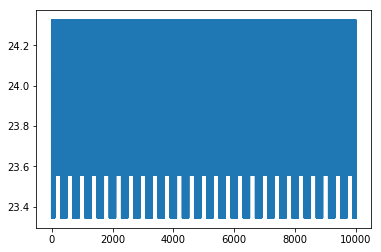

In [6]:
print(type(delta_bdm))
print(delta_bdm.shape)
plt.plot(delta_bdm)

In [7]:
# Compute BDM change for selected data points and keep the changes while running
# One array provide indices of elements that are to be change.
idx = np.array([[0, 0], [10, 10]], dtype=int)
# Another array provide new values to assign.
# Negative values mean that new values will be selected
# randomly from the set of other possible values from the alphabet.
values = np.array([-1, -1], dtype=int)
delta_bdm = perturbation.run(idx, values, keep_changes=True)

(2,)


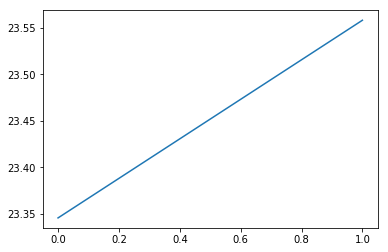

In [8]:
print(delta_bdm.shape)
plt.plot(delta_bdm)

In [9]:
# Here is an example applied to an adjacency matrix
# (only 1's are perturbed and switched to 0's)
# (so perturbations correspond to edge deletions)
X = np.random.randint(0, 2, (100, 100))

In [10]:
# Indices of nonzero entries in the matrix
idx = np.argwhere(X)

In [11]:
# PerturbationExperiment can be instantiated without passing data
pe = PerturbationExperiment(bdm, metric='bdm')

In [12]:
# data can be added later
pe.set_data(X)

In [13]:
# Run experiment and perturb edges
# No values argument is passed so perturbations automatically switch
# values to other values from the alphabet (in this case 1 --> 0)
delta_bdm = pe.run(idx)

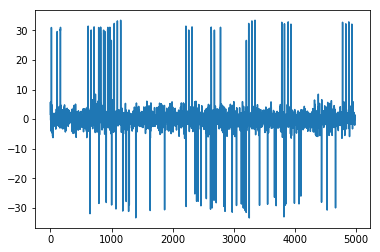

In [14]:
plt.plot(delta_bdm)

Parts which after yield negative contribution to the overall complexity after change are likely to be important for the system, since their removal make it more noisy. On the other hand parts that yield positive contribution to the overall complexity after change are likely to be noise since they extend the system’s description length.